In [ ]:
%matplotlib inline
#import sdf
import matplotlib
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import numpy as np
from numpy import ma
from matplotlib import colors, ticker, cm
from matplotlib.mlab import bivariate_normal
from optparse import OptionParser
import os
from mpl_toolkits.mplot3d import Axes3D
import random
from mpl_toolkits import mplot3d
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

font = {'family' : 'Helvetic',
        'color'  : 'black',
        'weight' : 'normal',
        'size'   : 16,
        }

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

part_number=1
nsteps=500015

insert1='./Data/'
insert_n='_0'
t1=np.loadtxt(insert1+'t'+insert_n+'.txt')
z1=np.loadtxt(insert1+'z'+insert_n+'.txt')
y1=np.loadtxt(insert1+'y'+insert_n+'.txt')
x1=np.loadtxt(insert1+'x'+insert_n+'.txt')
px1=np.loadtxt(insert1+'px'+insert_n+'.txt')
py1=np.loadtxt(insert1+'py'+insert_n+'.txt')
pz1=np.loadtxt(insert1+'pz'+insert_n+'.txt')
#ey=np.loadtxt(insert+'e_part'+'.txt')
#bz=np.loadtxt(insert+'b_part'+'.txt')
#ay=np.loadtxt(insert+'a_part'+'.txt')
radn1=np.loadtxt(insert1+'radn'+insert_n+'.txt')
radt1=np.loadtxt(insert1+'radt'+insert_n+'.txt')
opt1=np.loadtxt(insert1+'opt'+insert_n+'.txt')
eta1=np.loadtxt(insert1+'eta'+insert_n+'.txt')

t=np.reshape(t1,(part_number,nsteps))
x=np.reshape(x1,(part_number,nsteps))
y=np.reshape(y1,(part_number,nsteps))
z=np.reshape(z1,(part_number,nsteps))
px=np.reshape(px1,(part_number,nsteps))
py=np.reshape(py1,(part_number,nsteps))
pz=np.reshape(pz1,(part_number,nsteps))
#ey=np.reshape(ey,(part_number,nsteps))
#ay=np.reshape(ay,(part_number,nsteps))
radn=np.reshape(radn1,(part_number,nsteps))
radt=np.reshape(radt1,(part_number,nsteps))
opt=np.reshape(opt1,(part_number,nsteps))
eta=np.reshape(eta1,(part_number,nsteps))

gamma=np.sqrt(px**2+py**2+1)

R_dep=gamma-px

index=0
#index2=np.where(abs(y[index,:]/2/np.pi-0.0) < 1.0e-3)
plt.subplot(2,3,1)
a0=10.0
plt.scatter(x[index,:]/2/np.pi, y[index,:]/2/np.pi, c=R_dep[index,:], s=1, cmap='rainbow', edgecolors='None')
#plt.plot((x[index,:])/2/np.pi,y[index,:]/2/np.pi,'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
#plt.colorbar()
cbar=plt.colorbar(ticks=np.linspace(np.min(R_dep[index,:]), np.max(R_dep[index,:]), 5))
cbar.set_label(r'$R$', fontdict=font)
#plt.xlim(47,53)
#plt.ylim(-1.1,-0.7)
plt.xlabel(r'$x [\lambda]$',fontdict=font)
plt.ylabel(r'$y [\lambda]$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
#plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)

plt.subplot(2,3,2)
plt.scatter((t[index,:]-x[index,:])/2/np.pi,py[index,:], c=R_dep[index,:], s=1, cmap='rainbow', edgecolors='None')
#plt.plot((t[index,:])/2/np.pi,x[index,:]/2/np.pi,'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
#plt.colorbar()
plt.grid(color='k', linestyle='--', linewidth=1)
cbar=plt.colorbar(ticks=np.linspace(np.min(R_dep[index,:]), np.max(R_dep[index,:]), 5))
cbar.set_label(r'$R$', fontdict=font)
#plt.xlim(47,53)
#plt.ylim(-1.1,-0.7)
plt.xlabel(r'$\phi [2\pi]$',fontdict=font)
plt.ylabel(r'$P_y\ [m_ec]$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
#plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)

plt.subplot(2,3,3)
plt.scatter((t[index,:]-x[index,:])/2/np.pi,px[index,:], c=R_dep[index,:], s=1, cmap='rainbow', edgecolors='None')
#plt.plot((t[index,:])/2/np.pi,px[index,:],'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
#plt.colorbar()
plt.grid(color='k', linestyle='--', linewidth=1)
cbar=plt.colorbar(ticks=np.linspace(np.min(R_dep[index,:]), np.max(R_dep[index,:]), 5))
cbar.set_label(r'$R$', fontdict=font)
#plt.xlim(47,53)
#plt.ylim(-1.1,-0.7)
plt.xlabel(r'$\phi [2\pi]$',fontdict=font)
plt.ylabel(r'$P_x\ [m_ec]$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
#plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)

plt.subplot(2,3,4)
plt.scatter((t[index,:]-x[index,:])/2/np.pi, R_dep[index,:], c=R_dep[index,:], s=1, cmap='rainbow', edgecolors='None')
#plt.legend(loc='upper right')
#plt.colorbar()
plt.grid(color='k', linestyle='--', linewidth=1)
cbar=plt.colorbar(ticks=np.linspace(np.min(R_dep[index,:]), np.max(R_dep[index,:]), 5))
cbar.set_label(r'$R$', fontdict=font)
#plt.xlim(47,53)
#plt.ylim(-1.1,-0.7)
plt.xlabel(r'$\phi [2\pi]$',fontdict=font)
plt.ylabel(r'$R=\gamma-p_x$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
#plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)


plt.subplot(2,3,5)
plt.scatter(px[index,:],py[index,:], c=R_dep[index,:], s=1, cmap='rainbow', edgecolors='None')
#plt.plot((py[index,:]),px[index,:],'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
#plt.colorbar()
cbar=plt.colorbar(ticks=np.linspace(np.min(R_dep[index,:]), np.max(R_dep[index,:]), 5))
cbar.set_label(r'$R$', fontdict=font)
#plt.xlim(47,53)
#plt.ylim(-1.1,-0.7)
plt.xlabel('$P_x\ [m_ec]$',fontdict=font)
plt.ylabel('$P_y\ [m_ec]$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
#plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)

plt.subplot(2,3,6)
plt.scatter((t[index,:]-x[index,:])/2/np.pi,gamma[index,:], c=R_dep[index,:], s=1, cmap='rainbow', edgecolors='None')
#plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
#plt.legend(loc='upper right')
cbar=plt.colorbar(ticks=np.linspace(np.min(R_dep[index,:]), np.max(R_dep[index,:]), 5))
cbar.set_label(r'$R$', fontdict=font)#plt.xlim(47,53)
#plt.ylim(-1.1,-0.7)
plt.xlabel(r'$\phi [2\pi]$',fontdict=font)
plt.ylabel(r'$\gamma$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
#plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)
#print(index2)

fig = plt.gcf()
fig.set_size_inches(30, 20)
#fig.set_size_inches(5, 4.5)
#fig.savefig('./summary/a=80_b=0.01_py=100.png',format='png',dpi=250)
#plt.close("all")

finish 0000
finish 0200
finish 0400
finish 0600
finish 0800
finish 1000
finish 1200
finish 1400
finish 1600
finish 1800
finish 2000
finish 2200
finish 2400
finish 2600
finish 2800
finish 3000
finish 3200
finish 3400
finish 3600
finish 3800
finish 4000
finish 4200
finish 4400
finish 4600
finish 4800
finish 5000
finish 5200
finish 5400
finish 5600
finish 5800
finish 6000
finish 6200
finish 6400
finish 6600
finish 6800
finish 7000
finish 7200
finish 7400
finish 7600
finish 7800
finish 8000
finish 8200
finish 8400
finish 8600
finish 8800
finish 9000
finish 9200
finish 9400
finish 9600
finish 9800
finish 10000
finish 10200
finish 10400
finish 10600
finish 10800
finish 11000
finish 11200
finish 11400
finish 11600
finish 11800
finish 12000
finish 12200
finish 12400
finish 12600
finish 12800
finish 13000
finish 13200
finish 13400
finish 13600
finish 13800


KeyboardInterrupt: 

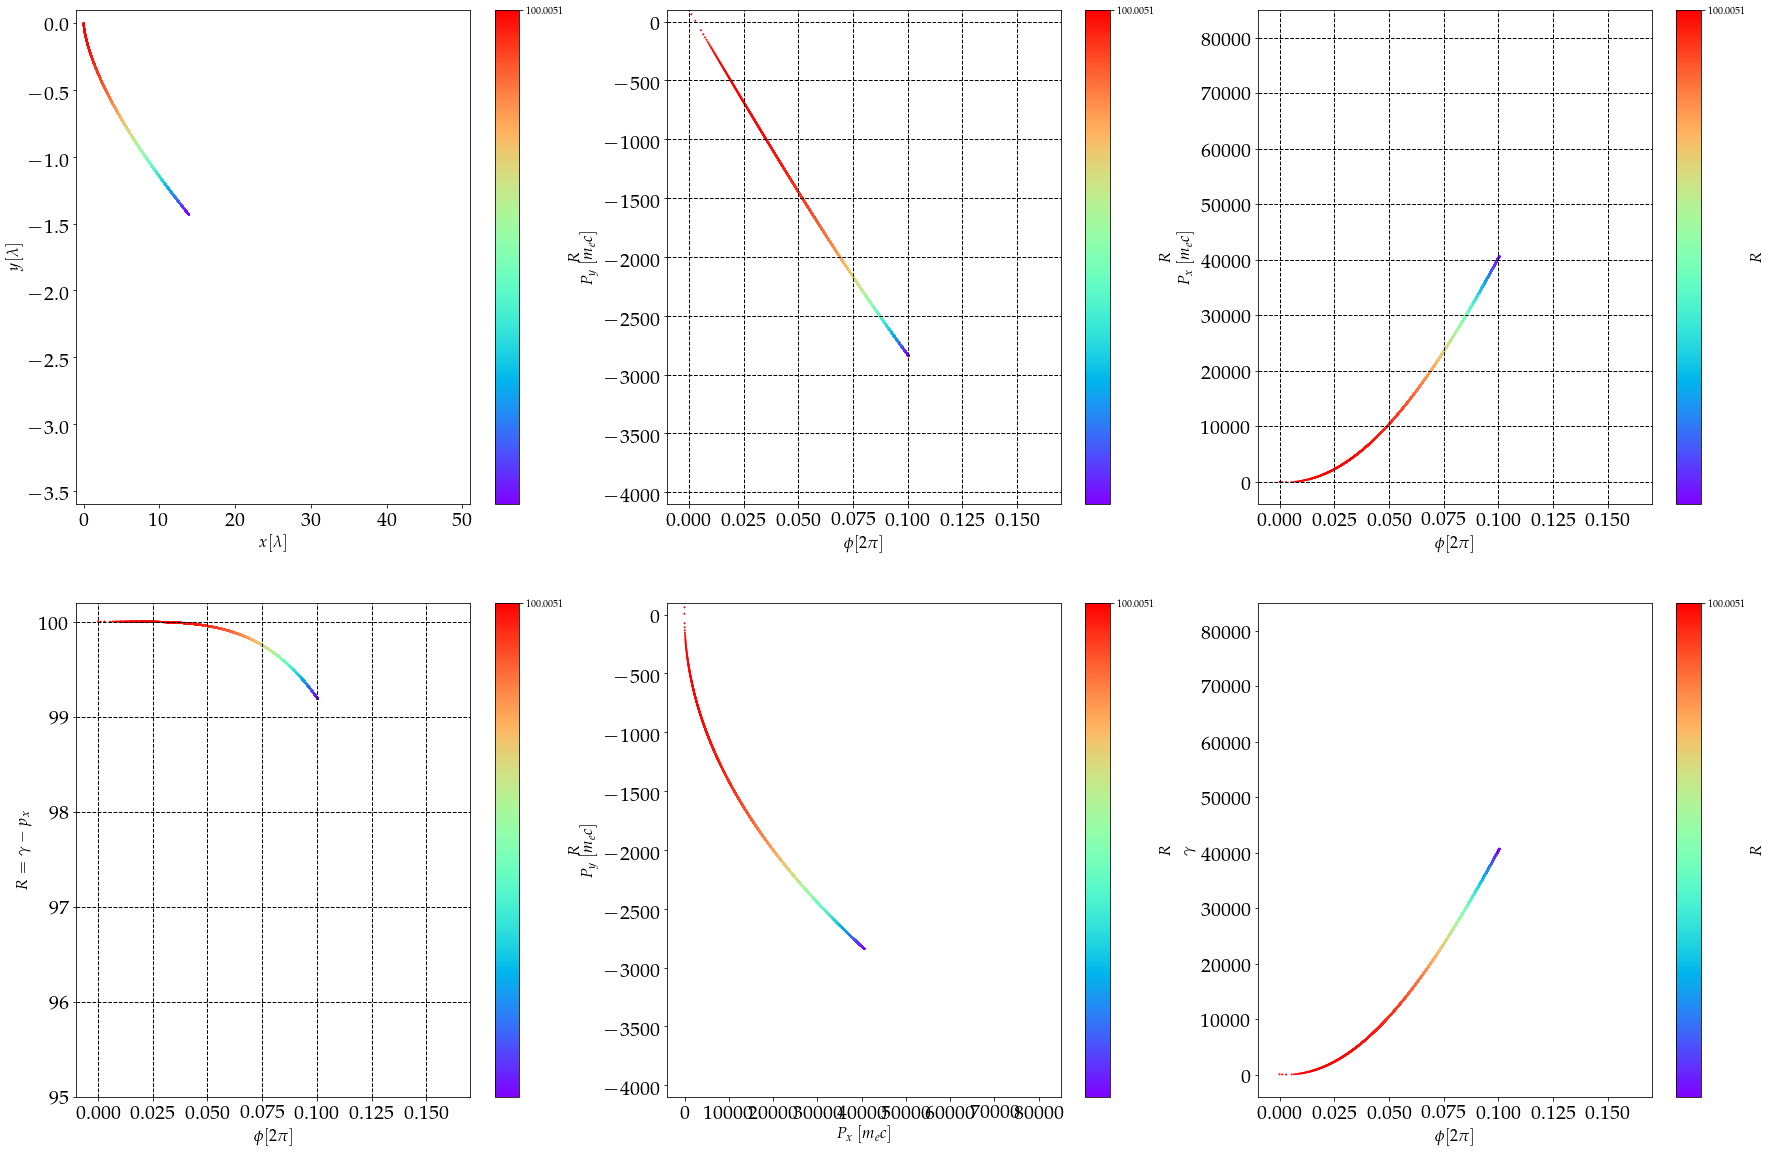

In [24]:
%matplotlib inline
#import sdf
import matplotlib
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import numpy as np
from numpy import ma
from matplotlib import colors, ticker, cm
from matplotlib.mlab import bivariate_normal
from optparse import OptionParser
import os
from mpl_toolkits.mplot3d import Axes3D
import random
from mpl_toolkits import mplot3d
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

font = {'family' : 'Helvetic',
        'color'  : 'black',
        'weight' : 'normal',
        'size'   : 16,
        }

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

part_number=1
nsteps=50002

insert1='./Data/'
insert_n='_0'
t1=np.loadtxt(insert1+'t'+insert_n+'.txt')
z1=np.loadtxt(insert1+'z'+insert_n+'.txt')
y1=np.loadtxt(insert1+'y'+insert_n+'.txt')
x1=np.loadtxt(insert1+'x'+insert_n+'.txt')
px1=np.loadtxt(insert1+'px'+insert_n+'.txt')
py1=np.loadtxt(insert1+'py'+insert_n+'.txt')
pz1=np.loadtxt(insert1+'pz'+insert_n+'.txt')
#ey=np.loadtxt(insert+'e_part'+'.txt')
#bz=np.loadtxt(insert+'b_part'+'.txt')
#ay=np.loadtxt(insert+'a_part'+'.txt')
radn1=np.loadtxt(insert1+'radn'+insert_n+'.txt')
radt1=np.loadtxt(insert1+'radt'+insert_n+'.txt')
opt1=np.loadtxt(insert1+'opt'+insert_n+'.txt')
eta1=np.loadtxt(insert1+'eta'+insert_n+'.txt')

t=np.reshape(t1,(part_number,nsteps))
x=np.reshape(x1,(part_number,nsteps))
y=np.reshape(y1,(part_number,nsteps))
z=np.reshape(z1,(part_number,nsteps))
px=np.reshape(px1,(part_number,nsteps))
py=np.reshape(py1,(part_number,nsteps))
pz=np.reshape(pz1,(part_number,nsteps))
#ey=np.reshape(ey,(part_number,nsteps))
#ay=np.reshape(ay,(part_number,nsteps))
radn=np.reshape(radn1,(part_number,nsteps))
radt=np.reshape(radt1,(part_number,nsteps))
opt=np.reshape(opt1,(part_number,nsteps))
eta=np.reshape(eta1,(part_number,nsteps))

gamma=np.sqrt(px**2+py**2+1)

R_dep=gamma-px

for i in np.arange(nsteps,step=200):
        index=0
        #index2=np.where(abs(y[index,:]/2/np.pi-0.0) < 1.0e-3)
        plt.subplot(2,3,1)
        a0=10.0
        plt.scatter(x[index,:i]/2/np.pi, y[index,:i]/2/np.pi, c=R_dep[index,:i], s=4, cmap='rainbow', edgecolors='None')
        #plt.plot((x[index,:])/2/np.pi,y[index,:]/2/np.pi,'--k',linewidth=2.5,label='No RR')
        #plt.legend(loc='upper right')
        #plt.colorbar()
        cbar=plt.colorbar(ticks=np.linspace(np.min(R_dep[index,:]), np.max(R_dep[index,:]), 5))
        cbar.set_label(r'$R$', fontdict=font)
        plt.xlim(-1,51)
        plt.ylim(-3.6,0.1)
        plt.xlabel(r'$x [\lambda]$',fontdict=font)
        plt.ylabel(r'$y [\lambda]$',fontdict=font)
        plt.xticks(fontsize=20); plt.yticks(fontsize=20);
        #plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)

        plt.subplot(2,3,2)
        plt.scatter((t[index,:i]-x[index,:i])/2/np.pi,py[index,:i], c=R_dep[index,:i], s=4, cmap='rainbow', edgecolors='None')
        #plt.plot((t[index,:])/2/np.pi,x[index,:]/2/np.pi,'--k',linewidth=2.5,label='No RR')
        #plt.legend(loc='upper right')
        #plt.colorbar()
        plt.grid(color='k', linestyle='--', linewidth=1)
        cbar=plt.colorbar(ticks=np.linspace(np.min(R_dep[index,:]), np.max(R_dep[index,:]), 5))
        cbar.set_label(r'$R$', fontdict=font)
        plt.xlim(-0.01,0.17)
        plt.ylim(-4100,100)
        plt.xlabel(r'$\phi [2\pi]$',fontdict=font)
        plt.ylabel(r'$P_y\ [m_ec]$',fontdict=font)
        plt.xticks(fontsize=20); plt.yticks(fontsize=20);
        #plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)

        plt.subplot(2,3,3)
        plt.scatter((t[index,:i]-x[index,:i])/2/np.pi,px[index,:i], c=R_dep[index,:i], s=4, cmap='rainbow', edgecolors='None')
        #plt.plot((t[index,:])/2/np.pi,px[index,:],'--k',linewidth=2.5,label='No RR')
        #plt.legend(loc='upper right')
        #plt.colorbar()
        plt.grid(color='k', linestyle='--', linewidth=1)
        cbar=plt.colorbar(ticks=np.linspace(np.min(R_dep[index,:]), np.max(R_dep[index,:]), 5))
        cbar.set_label(r'$R$', fontdict=font)
        plt.xlim(-0.01,0.17)
        plt.ylim(-4000,85000)
        plt.xlabel(r'$\phi [2\pi]$',fontdict=font)
        plt.ylabel(r'$P_x\ [m_ec]$',fontdict=font)
        plt.xticks(fontsize=20); plt.yticks(fontsize=20);
        #plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)

        plt.subplot(2,3,4)
        plt.scatter((t[index,:i]-x[index,:i])/2/np.pi, R_dep[index,:i], c=R_dep[index,:i], s=4, cmap='rainbow', edgecolors='None')
        #plt.legend(loc='upper right')
        #plt.colorbar()
        plt.grid(color='k', linestyle='--', linewidth=1)
        cbar=plt.colorbar(ticks=np.linspace(np.min(R_dep[index,:]), np.max(R_dep[index,:]), 5))
        cbar.set_label(r'$R$', fontdict=font)
        plt.xlim(-0.01,0.17)
        plt.ylim(95,100.2)
        plt.xlabel(r'$\phi [2\pi]$',fontdict=font)
        plt.ylabel(r'$R=\gamma-p_x$',fontdict=font)
        plt.xticks(fontsize=20); plt.yticks(fontsize=20);
        #plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)


        plt.subplot(2,3,5)
        plt.scatter(px[index,:i],py[index,:i], c=R_dep[index,:i], s=4, cmap='rainbow', edgecolors='None')
        #plt.plot((py[index,:]),px[index,:],'--k',linewidth=2.5,label='No RR')
        #plt.legend(loc='upper right')
        #plt.colorbar()
        cbar=plt.colorbar(ticks=np.linspace(np.min(R_dep[index,:]), np.max(R_dep[index,:]), 5))
        cbar.set_label(r'$R$', fontdict=font)
        plt.xlim(-4000,85000)
        plt.ylim(-4100,100)
        plt.xlabel('$P_x\ [m_ec]$',fontdict=font)
        plt.ylabel('$P_y\ [m_ec]$',fontdict=font)
        plt.xticks(fontsize=20); plt.yticks(fontsize=20);
        #plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)

        plt.subplot(2,3,6)
        plt.scatter((t[index,:i]-x[index,:i])/2/np.pi,gamma[index,:i], c=R_dep[index,:i], s=4, cmap='rainbow', edgecolors='None')
        #plt.plot((t[index,:])/2/np.pi,np.sqrt(px[index,:]**2+py[index,:]**2+1),'--k',linewidth=2.5,label='No RR')
        #plt.legend(loc='upper right')
        cbar=plt.colorbar(ticks=np.linspace(np.min(R_dep[index,:]), np.max(R_dep[index,:]), 5))
        cbar.set_label(r'$R$', fontdict=font)#plt.xlim(47,53)
        plt.xlim(-0.01,0.17)
        plt.ylim(-4000,85000)
        plt.xlabel(r'$\phi [2\pi]$',fontdict=font)
        plt.ylabel(r'$\gamma$',fontdict=font)
        plt.xticks(fontsize=20); plt.yticks(fontsize=20);
        #plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)
        #print(index2)

        fig = plt.gcf()
        fig.set_size_inches(30, 20)
        #fig.set_size_inches(5, 4.5)
        fig.savefig('./gif_1/'+str(i).zfill(4)+'.png',format='png',dpi=160)
        print('finish '+str(i).zfill(4))
        plt.close("all")

In [21]:
x=np.arange(10,step=2)
x[:4]

array([0, 2, 4, 6])

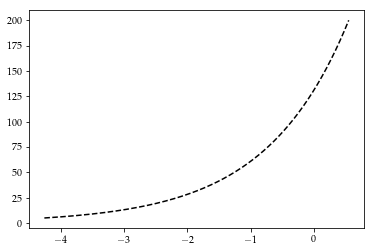

In [51]:
p=np.linspace(5,200,501)
a0=150.0
alpha=0.01*p**3/a0**2
plt.plot(np.log10(alpha),p,'--k')
#plt.xscale('log')

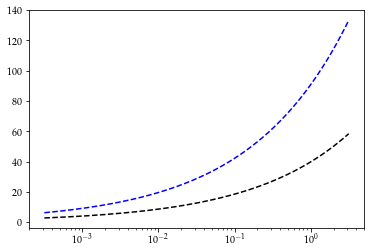

In [49]:
a0=100.0
k=0.4
alpha=np.logspace(-3.5,0.5,201)
p0=(a0*(alpha)**0.5/k)**0.667
plt.plot(alpha,p0,'--k')
p0=(a0*(alpha)**0.5/0.29/k)**0.667
plt.plot(alpha,p0,'--b')
plt.xscale('log')

In [43]:
np.logspace(-3,1,50)

array([  1.00000000e-03,   1.20679264e-03,   1.45634848e-03,
         1.75751062e-03,   2.12095089e-03,   2.55954792e-03,
         3.08884360e-03,   3.72759372e-03,   4.49843267e-03,
         5.42867544e-03,   6.55128557e-03,   7.90604321e-03,
         9.54095476e-03,   1.15139540e-02,   1.38949549e-02,
         1.67683294e-02,   2.02358965e-02,   2.44205309e-02,
         2.94705170e-02,   3.55648031e-02,   4.29193426e-02,
         5.17947468e-02,   6.25055193e-02,   7.54312006e-02,
         9.10298178e-02,   1.09854114e-01,   1.32571137e-01,
         1.59985872e-01,   1.93069773e-01,   2.32995181e-01,
         2.81176870e-01,   3.39322177e-01,   4.09491506e-01,
         4.94171336e-01,   5.96362332e-01,   7.19685673e-01,
         8.68511374e-01,   1.04811313e+00,   1.26485522e+00,
         1.52641797e+00,   1.84206997e+00,   2.22299648e+00,
         2.68269580e+00,   3.23745754e+00,   3.90693994e+00,
         4.71486636e+00,   5.68986603e+00,   6.86648845e+00,
         8.28642773e+00,

In [52]:
1.14/8.0-1.0/6/1.4

0.023452380952380933

In [130]:
-(0.25-1+2.0**0.5/2)*2

0.08578643762690485

In [131]:
(3.14/4.0-1.0/2.0**0.5)

0.07789321881345257

-69039.435796


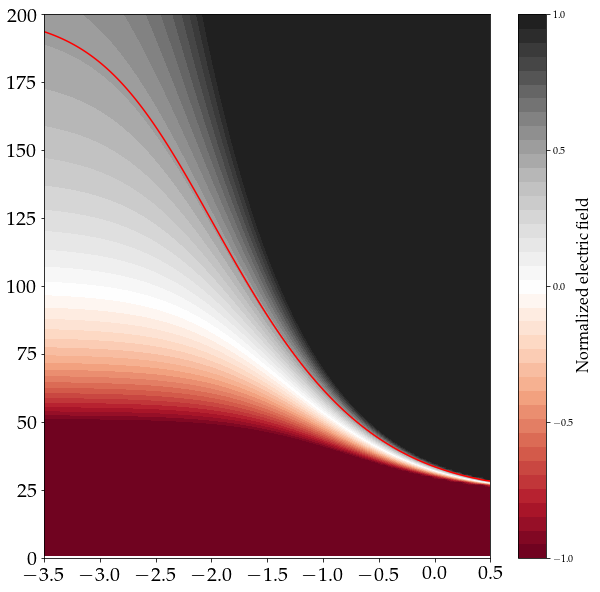

In [303]:
alpha=np.linspace(-3.5,0.5,201)
p=np.linspace(1,201,201)
a0=100.0
X_g, Y = np.meshgrid(alpha, p)
X=10**X_g
Z=-X**0.5/Y**1.5*a0+X**0.5/Y**0.5-(X**1.5/Y**4.5)*a0**3*0.02345+(X**1.5/Y**2.5)*a0**2*(0.0858)-(X**1.5/Y**0.5)*a0*(0.0779)+(X**1.5/Y**3.5)*a0**2*0.08286-X**1.5/Y**1.5*a0*0.3+X**1.5*Y**0.5*0.31
Z=Z/(X/Y)**0.5
print(np.min(Z))
Z[Z<-1]=-1
Z[Z>1]=1
#Z=np.log10(Z)
levels = np.linspace(np.min(Z), np.max(Z), 40) 
#levels = np.array([100000.0])
plt.contourf(X_g, Y, Z, levels, cmap=cm.RdGy)
cbar=plt.colorbar(ticks=np.linspace(np.min(Z), np.max(Z), 5))
plt.contour(X_g, Y, Z, 0.5, colors='r')

#plt.xscale('log')


#### manifesting colorbar, changing label and axis properties ####
cbar.set_label('Normalized electric field',fontdict=font)        
#plt.xlabel('X [$\mu m$]',fontdict=font)
#plt.ylabel('Y [$\mu m$]',fontdict=font)
plt.xlim(-3.5,0.5)
plt.ylim(0,200)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
fig = plt.gcf()
fig.set_size_inches(10, 10)

-99.0


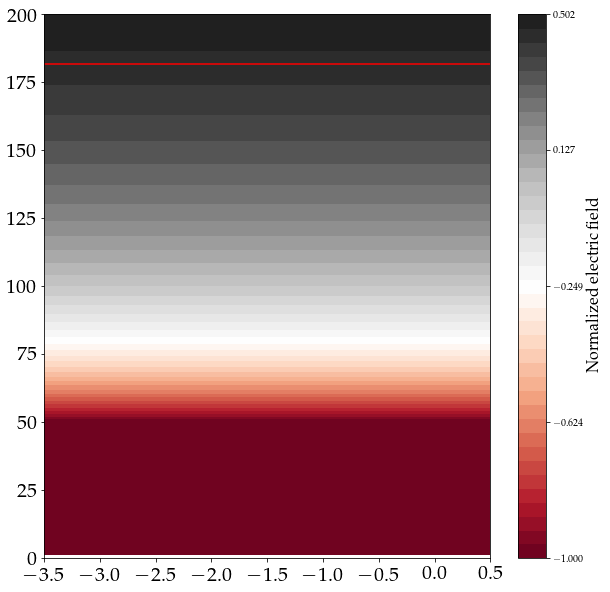

In [308]:
alpha=np.linspace(-3.5,0.5,201)
p=np.linspace(1,201,201)
a0=100.0
X_g, Y = np.meshgrid(alpha, p)
X=10**X_g
Z=-X**0.5/Y**1.5*a0+X**0.5/Y**0.5#-(X**1.5/Y**4.5)*a0**3*0.02345+(X**1.5/Y**2.5)*a0**2*(0.0858)-(X**1.5/Y**0.5)*a0*(0.0779)+(X**1.5/Y**3.5)*a0**2*0.08286-X**1.5/Y**1.5*a0*0.3+X**1.5*Y**0.5*0.31
Z=Z/(X/Y)**0.5
print(np.min(Z))
Z[Z<-1]=-1
Z[Z>1]=1
#Z=np.log10(Z)
levels = np.linspace(np.min(Z), np.max(Z), 40) 
#levels = np.array([100000.0])
plt.contourf(X_g, Y, Z, levels, cmap=cm.RdGy)
cbar=plt.colorbar(ticks=np.linspace(np.min(Z), np.max(Z), 5))
plt.contour(X_g, Y, Z, 0.45, colors='r')

#plt.xscale('log')


#### manifesting colorbar, changing label and axis properties ####
cbar.set_label('Normalized electric field',fontdict=font)        
#plt.xlabel('X [$\mu m$]',fontdict=font)
#plt.ylabel('Y [$\mu m$]',fontdict=font)
plt.xlim(-3.5,0.5)
plt.ylim(0,200)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
fig = plt.gcf()
fig.set_size_inches(10, 10)

-68940.435796


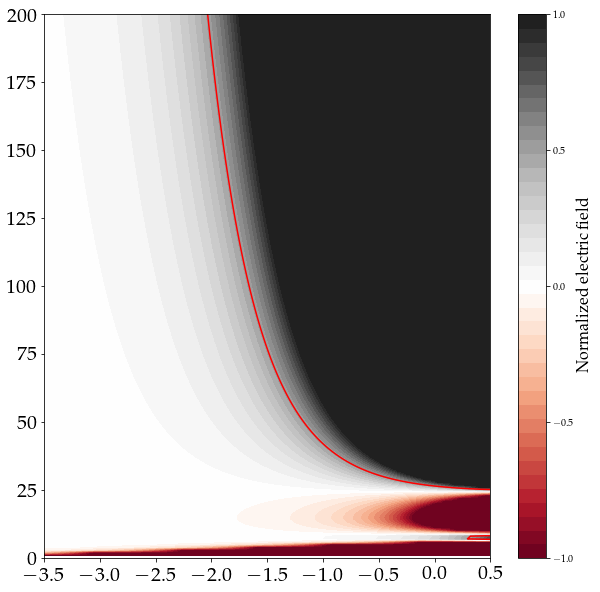

In [311]:
alpha=np.linspace(-3.5,0.5,201)
p=np.linspace(1,201,201)
a0=100.0
X_g, Y = np.meshgrid(alpha, p)
X=10**X_g
Z=-(X**1.5/Y**4.5)*a0**3*0.02345+(X**1.5/Y**2.5)*a0**2*(0.0858)-(X**1.5/Y**0.5)*a0*(0.0779)+(X**1.5/Y**3.5)*a0**2*0.08286-X**1.5/Y**1.5*a0*0.3+X**1.5*Y**0.5*0.31
Z=Z/(X/Y)**0.5
print(np.min(Z))
Z[Z<-1]=-1
Z[Z>1]=1
#Z=np.log10(Z)
levels = np.linspace(np.min(Z), np.max(Z), 40) 
#levels = np.array([100000.0])
plt.contourf(X_g, Y, Z, levels, cmap=cm.RdGy)
cbar=plt.colorbar(ticks=np.linspace(np.min(Z), np.max(Z), 5))
plt.contour(X_g, Y, Z, 0.5, colors='r')

#plt.xscale('log')


#### manifesting colorbar, changing label and axis properties ####
cbar.set_label('Normalized electric field',fontdict=font)        
#plt.xlabel('X [$\mu m$]',fontdict=font)
#plt.ylabel('Y [$\mu m$]',fontdict=font)
plt.xlim(-3.5,0.5)
plt.ylim(0,200)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
fig = plt.gcf()
fig.set_size_inches(10, 10)

-26100.5353842


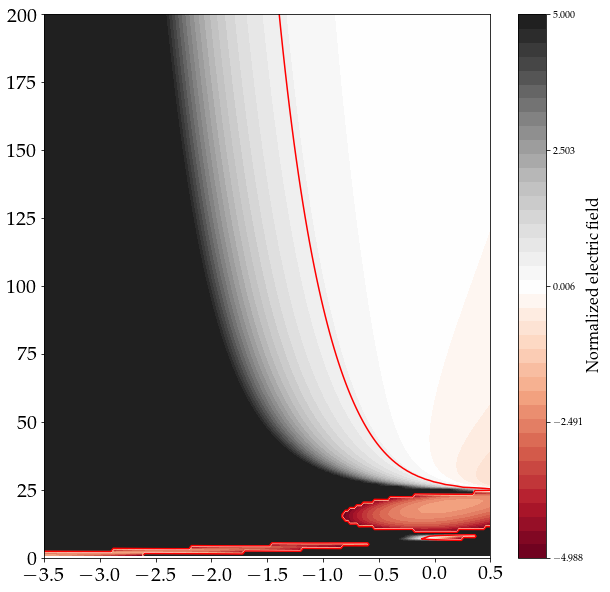

In [318]:
alpha=np.linspace(-3.5,0.5,201)
p=np.linspace(1,201,201)
a0=100.0
X_g, Y = np.meshgrid(alpha, p)
X=10**X_g
Z=-X**0.5/Y**1.5*a0+X**0.5/Y**0.5/(-(X**1.5/Y**4.5)*a0**3*0.02345+(X**1.5/Y**2.5)*a0**2*(0.0858)-(X**1.5/Y**0.5)*a0*(0.0779)+(X**1.5/Y**3.5)*a0**2*0.08286-X**1.5/Y**1.5*a0*0.3+X**1.5*Y**0.5*0.31)
#Z=Z/(X/Y)**0.5
print(np.min(Z))
Z[abs(Z)>5]=5
#Z[Z>1]=1
#Z=np.log10(Z)
levels = np.linspace(np.min(Z), np.max(Z), 40) 
#levels = np.array([100000.0])
plt.contourf(X_g, Y, Z, levels, cmap=cm.RdGy)
cbar=plt.colorbar(ticks=np.linspace(np.min(Z), np.max(Z), 5))
plt.contour(X_g, Y, Z, 0.45, colors='r')

#plt.xscale('log')


#### manifesting colorbar, changing label and axis properties ####
cbar.set_label('Normalized electric field',fontdict=font)        
#plt.xlabel('X [$\mu m$]',fontdict=font)
#plt.ylabel('Y [$\mu m$]',fontdict=font)
plt.xlim(-3.5,0.5)
plt.ylim(0,200)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
fig = plt.gcf()
fig.set_size_inches(10, 10)

-572346.323681
-238601.416591
-69039.435796
-8043.82294627
-421.823577463


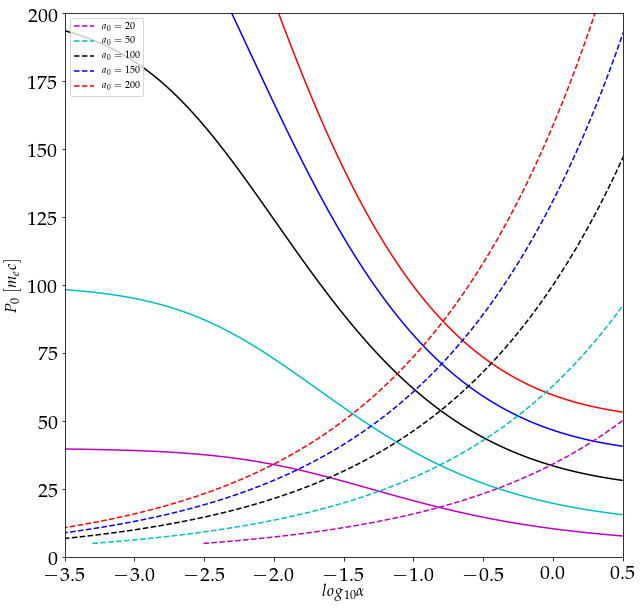

In [321]:
alpha=np.linspace(-3.5,0.5,201)
p=np.linspace(1,201,201)
a0=200.0
X_g, Y = np.meshgrid(alpha, p)
X=10**X_g
Z=-X**0.5/Y**1.5*a0+X**0.5/Y**0.5-(X**1.5/Y**4.5)*a0**3*0.02345+(X**1.5/Y**2.5)*a0**2*(0.0858)-(X**1.5/Y**0.5)*a0*(0.0779)+(X**1.5/Y**3.5)*a0**2*0.08286-X**1.5/Y**1.5*a0*0.3+X**1.5*Y**0.5*0.31
Z=Z/(X/Y)**0.5
print(np.min(Z))
Z[Z<-20]=-20
#Z=np.log10(Z)
levels = np.linspace(np.min(Z), np.max(Z), 40) 
#levels = np.array([100000.0])
#plt.contourf(X_g, Y, Z, levels, cmap=cm.pink_r)
#cbar=plt.colorbar(ticks=np.linspace(np.min(Z), np.max(Z), 5))
plt.contour(X_g, Y, Z, 0.5, colors='r')

a0=150.0
X_g, Y = np.meshgrid(alpha, p)
X=10**X_g
Z=-X**0.5/Y**1.5*a0+X**0.5/Y**0.5-(X**1.5/Y**4.5)*a0**3*0.02345+(X**1.5/Y**2.5)*a0**2*(0.0858)-(X**1.5/Y**0.5)*a0*(0.0779)+(X**1.5/Y**3.5)*a0**2*0.08286-X**1.5/Y**1.5*a0*0.3+X**1.5*Y**0.5*0.31
Z=Z/(X/Y)**0.5
print(np.min(Z))
Z[Z<-20]=-20
#Z=np.log10(Z)
levels = np.linspace(np.min(Z), np.max(Z), 40) 
plt.contour(X_g, Y, Z, 0.5, colors='b')

a0=100.0
X_g, Y = np.meshgrid(alpha, p)
X=10**X_g
Z=-X**0.5/Y**1.5*a0+X**0.5/Y**0.5-(X**1.5/Y**4.5)*a0**3*0.02345+(X**1.5/Y**2.5)*a0**2*(0.0858)-(X**1.5/Y**0.5)*a0*(0.0779)+(X**1.5/Y**3.5)*a0**2*0.08286-X**1.5/Y**1.5*a0*0.3+X**1.5*Y**0.5*0.31
Z=Z/(X/Y)**0.5
print(np.min(Z))
Z[Z<-20]=-20
#Z=np.log10(Z)
levels = np.linspace(np.min(Z), np.max(Z), 40) 
plt.contour(X_g, Y, Z, 0.5, colors='k')

a0=50.0
X_g, Y = np.meshgrid(alpha, p)
X=10**X_g
Z=-X**0.5/Y**1.5*a0+X**0.5/Y**0.5-(X**1.5/Y**4.5)*a0**3*0.02345+(X**1.5/Y**2.5)*a0**2*(0.0858)-(X**1.5/Y**0.5)*a0*(0.0779)+(X**1.5/Y**3.5)*a0**2*0.08286-X**1.5/Y**1.5*a0*0.3+X**1.5*Y**0.5*0.31
Z=Z/(X/Y)**0.5
print(np.min(Z))
Z[Z<-20]=-20
#Z=np.log10(Z)
levels = np.linspace(np.min(Z), np.max(Z), 40) 
plt.contour(X_g, Y, Z, 0.5, colors='c')

a0=20.0
X_g, Y = np.meshgrid(alpha, p)
X=10**X_g
Z=-X**0.5/Y**1.5*a0+X**0.5/Y**0.5-(X**1.5/Y**4.5)*a0**3*0.02345+(X**1.5/Y**2.5)*a0**2*(0.0858)-(X**1.5/Y**0.5)*a0*(0.0779)+(X**1.5/Y**3.5)*a0**2*0.08286-X**1.5/Y**1.5*a0*0.3+X**1.5*Y**0.5*0.31
Z=Z/(X/Y)**0.5
print(np.min(Z))
Z[Z<-20]=-20
#Z=np.log10(Z)
levels = np.linspace(np.min(Z), np.max(Z), 40) 
plt.contour(X_g, Y, Z, 0.5, colors='m')

p=np.linspace(5,200,501)
a0=20.0
alpha=0.01*p**3/a0**2
plt.plot(np.log10(alpha),p,'--m',label=r'$a_0=20$')

a0=50.0
alpha=0.01*p**3/a0**2
plt.plot(np.log10(alpha),p,'--c',label=r'$a_0=50$')

a0=100.0
alpha=0.01*p**3/a0**2
plt.plot(np.log10(alpha),p,'--k',label=r'$a_0=100$')

a0=150.0
alpha=0.01*p**3/a0**2
plt.plot(np.log10(alpha),p,'--b',label=r'$a_0=150$')

a0=200.0
alpha=0.01*p**3/a0**2
plt.plot(np.log10(alpha),p,'--r',label=r'$a_0=200$')

plt.legend(loc='best')
#plt.xscale('log')


#### manifesting colorbar, changing label and axis properties ####
cbar.set_label('Normalized electric field',fontdict=font)        
plt.xlabel(r'$log_{10}\alpha$',fontdict=font)
plt.ylabel(r'$P_0\ [m_ec]$',fontdict=font)
plt.xlim(-3.5,0.5)
plt.ylim(0,200)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
fig = plt.gcf()
fig.set_size_inches(10, 10)

In [167]:
100.0**3

1000000.0

-1.38095238095


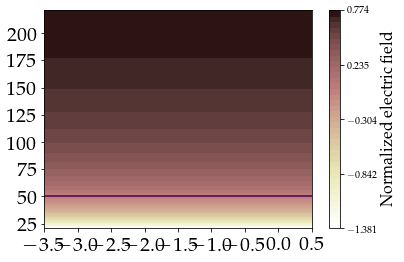

In [237]:
alpha=np.linspace(-3.5,0.5,201)
p=np.linspace(21,221,201)
a0=50.0
X_g, Y = np.meshgrid(alpha, p)
X=10**X_g
Z=-X**0.5/Y**1.5*a0+X**0.5/Y**0.5#-(X**1.5/Y**4.5)*a0**3*0.02345+(X**1.5/Y**2.5)*a0**2*(0.0858)-(X**1.5/Y**0.5)*a0*(0.0779)+(X**1.5/Y**3.5)*a0**2*0.08286-X**1.5/Y**1.5*a0*0.3+X**1.5*Y**0.5*0.31
Z=Z/(X/Y)**0.5

print(np.min(Z))
#Z[Z<-20]=-20
#Z=np.log10(Z)
levels = np.linspace(np.min(Z), np.max(Z), 40) 
#levels = np.array([100000.0])
plt.contourf(X_g, Y, Z, levels, cmap=cm.pink_r)
cbar=plt.colorbar(ticks=np.linspace(np.min(Z), np.max(Z), 5))
plt.contour(X_g, Y, Z, -0.0)
#### manifesting colorbar, changing label and axis properties ####
cbar.set_label('Normalized electric field',fontdict=font)        
#plt.xlabel('X [$\mu m$]',fontdict=font)
#plt.ylabel('Y [$\mu m$]',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);

0.000757177240342


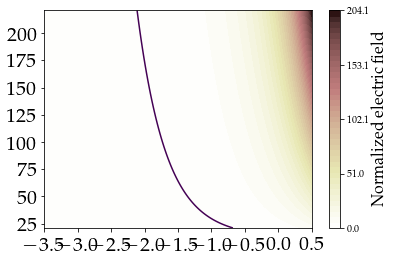

In [257]:
alpha=np.linspace(-3.5,0.5,201)
p=np.linspace(21,221,201)
a0=50.0
X_g, Y = np.meshgrid(alpha, p)
X=10**X_g
Z=-(X**1.5/Y**4.5)*a0**3*0.02345+(X**1.5/Y**2.5)*a0**2*(0.0858)-(X**1.5/Y**0.5)*a0*(0.0779)+(X**1.5/Y**3.5)*a0**2*0.08286-X**1.5/Y**1.5*a0*0.3+X**1.5*Y**0.5*0.31
Z=Z/(X/Y)**0.5

print(np.min(Z))
#Z[Z>20]=20
#Z=np.log10(Z)
levels = np.linspace(np.min(Z), np.max(Z), 40) 
#levels = np.array([100000.0])
plt.contourf(X_g, Y, Z, levels, cmap=cm.pink_r)
cbar=plt.colorbar(ticks=np.linspace(np.min(Z), np.max(Z), 5))
plt.contour(X_g, Y, Z, 0.5)
#### manifesting colorbar, changing label and axis properties ####
cbar.set_label('Normalized electric field',fontdict=font)        
#plt.xlabel('X [$\mu m$]',fontdict=font)
#plt.ylabel('Y [$\mu m$]',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);

In [323]:
from sympy import *
init_printing(use_unicode=False, wrap_line=False, no_global=True)
x=Symbol('x')

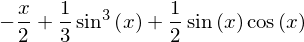

In [340]:
integrate(cos(x)*(sin(x))**2-(sin(x))**2)

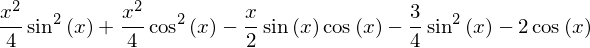

In [342]:
integrate(x*(sin(x))**2-2*cos(x)*sin(x)+2*sin(x))

In [343]:
integrate(cos(x)-2*x*sin(x))

In [345]:
3.14**2/16.0-0.75

-13702.9420141


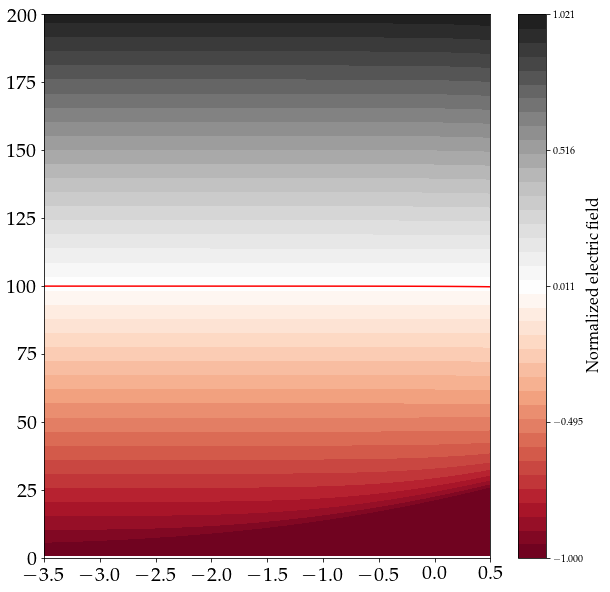

In [375]:
alpha=np.linspace(-3.5,0.5,201)
p=np.linspace(1,201,201)
a0=100.0
X_g, Y = np.meshgrid(alpha, p)
X=10**X_g
Z=-(X/Y)**0.5*a0/Y+(X/Y)**0.5+(X/Y)**1.5*a0**3/Y**3*(-0.4517)+(X/Y)**1.5*a0**2/Y**2*(2-0.1338)+(X/Y)**1.5*(3.14**2/8)-(X/Y)**1.5*a0/Y*(1+1.57)
#Z=Z/(X/Y)**0.5
#Z=Z**2/(Y**2-1)/Y*X
Z=Z*Y**1.5/X**0.5/a0
print(np.min(Z))
Z[Z<-1]=-1
#Z[Z>2]=2
#Z=np.log10(Z)
levels = np.linspace(np.min(Z), np.max(Z), 40) 
#levels = np.array([100000.0])
plt.contourf(X_g, Y, Z, levels, cmap=cm.RdGy)
cbar=plt.colorbar(ticks=np.linspace(np.min(Z), np.max(Z), 5))
plt.contour(X_g, Y, Z, 0.0, colors='r')

#plt.xscale('log')


#### manifesting colorbar, changing label and axis properties ####
cbar.set_label('Normalized electric field',fontdict=font)        
#plt.xlabel('X [$\mu m$]',fontdict=font)
#plt.ylabel('Y [$\mu m$]',fontdict=font)
plt.xlim(-3.5,0.5)
plt.ylim(0,200)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
fig = plt.gcf()
fig.set_size_inches(10, 10)

-1419.11711116


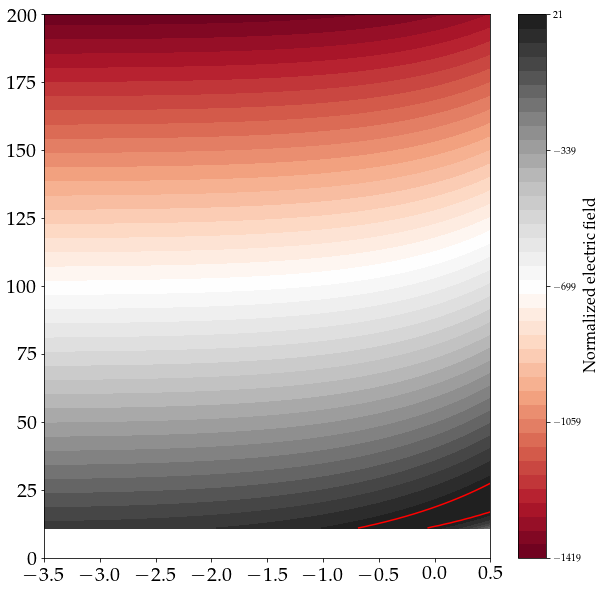

In [93]:
%matplotlib inline
#import sdf
import matplotlib
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import numpy as np
from numpy import ma
from matplotlib import colors, ticker, cm
from matplotlib.mlab import bivariate_normal
from optparse import OptionParser
import os
from mpl_toolkits.mplot3d import Axes3D
import random
from mpl_toolkits import mplot3d
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

font = {'family' : 'Helvetic',
        'color'  : 'black',
        'weight' : 'normal',
        'size'   : 16,
        }

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
alpha=np.linspace(-3.5,0.5,201)
p=np.linspace(11,201,201)
a0=150.0
dd=1
X_g, Y = np.meshgrid(alpha, p)
X=10.0**X_g
#Z=Y-((0.71*(Y/X)**0.5*Y-a0)*X**0.5/Y)**2
#Z=4*(X**0.5*Y**0.5*a0-0.14*Y**2)
#Z=(4*Y**0.5*X**0.5*100.0*dd+0.16*Y**2)/Y**2
B=X**0.5/Y**1.5*(4*0.71*Y**1.5/X**0.5-a0)#+a0*np.cos(0.71*(Y/X)))
Z=(1-B**2)*Y
#Z=Z/Y
#Z=Z/(X/Y)**0.5
#Z=Z**2/(Y**2-1)/Y*X

#Z=Z*Y**1.5/X**0.5/a0
print(np.min(Z))
#Z[Z<-20]=-20
#Z[Z>1]=1
#Z=np.log10(Z)
levels = np.linspace(np.min(Z), np.max(Z), 40) 
#levels = np.array([100000.0])
plt.contourf(X_g, Y, Z, levels, cmap=cm.RdGy)
cbar=plt.colorbar(ticks=np.linspace(np.min(Z), np.max(Z), 5))
plt.contour(X_g, Y, Z, 0.5, colors='r')

#plt.xscale('log')


#### manifesting colorbar, changing label and axis properties ####
cbar.set_label('Normalized electric field',fontdict=font)        
#plt.xlabel('X [$\mu m$]',fontdict=font)
#plt.ylabel('Y [$\mu m$]',fontdict=font)
plt.xlim(-3.5,0.5)
plt.ylim(0,200)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
fig = plt.gcf()
fig.set_size_inches(10, 10)